<a href="https://colab.research.google.com/github/skaurl/tourbigdata/blob/master/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)

df20 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2020.txt", sep = "|", encoding = 'cp949')
df20['cln_age_r'] = df20['cln_age_r'].astype('object')
df20['ta_ym'] = df20['ta_ym'].astype('object')

df19 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2019.txt", sep = "|", encoding = 'cp949')
df19 = df19[df19['ta_ym'] != 201907]
df19 = df19[df19['ta_ym'] != 201908]
df19 = df19[df19['ta_ym'] != 201909]
df19 = df19[df19['ta_ym'] != 201910]
df19 = df19[df19['ta_ym'] != 201911]
df19 = df19[df19['ta_ym'] != 201912]
df19['cln_age_r'] = df19['cln_age_r'].astype('object')
df19['ta_ym'] = df19['ta_ym'].astype('object')

In [110]:
print(df20.dtypes)
print(df19.dtypes)

v1                 object
v2                 object
v3                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm               float64
usec                int64
dtype: object
v1                 object
v2                 object
v3                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm               float64
usec                int64
dtype: object


In [111]:
print("2020년 1월 ~ 6월 총 취급액",sum(df20['vlm']))
print("2019년 1월 ~ 6월 총 취급액",sum(df19['vlm']))

print("2020년 1월 ~ 6월 총 이용건수",sum(df20['usec']))
print("2019년 1월 ~ 6월 총 이용건수",sum(df19['usec']))

2020년 1월 ~ 6월 총 취급액 157882601058677.0
2019년 1월 ~ 6월 총 취급액 165031927669347.0
2020년 1월 ~ 6월 총 이용건수 4536954067
2019년 1월 ~ 6월 총 이용건수 4719316710


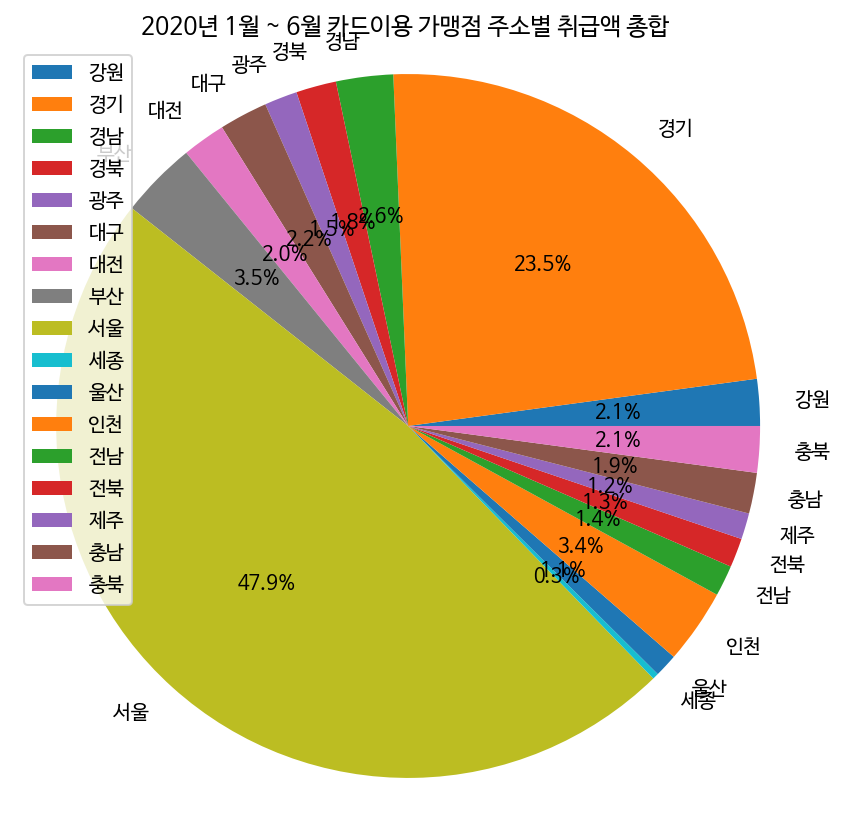

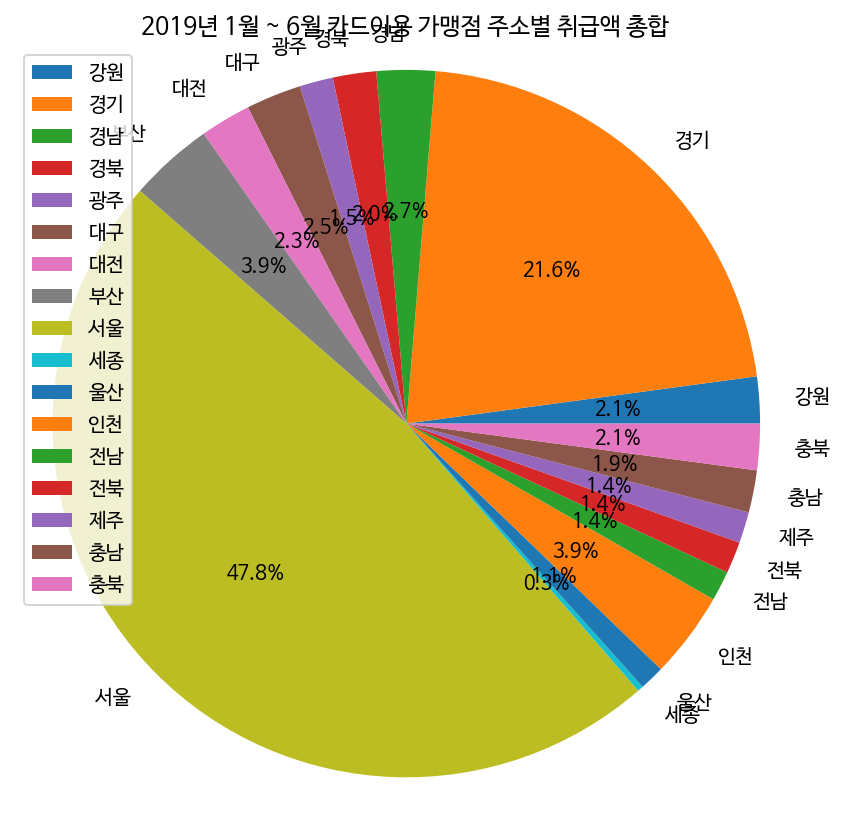

             vlm        usec           vlm        usec
v2                                                    
강원  3.386631e+12   105234177  3.523208e+12   112031554
경기  3.714828e+13  1123106423  3.556768e+13  1110842771
경남  4.136648e+12   128343194  4.410252e+12   132823012
경북  2.917655e+12    96408826  3.267740e+12   108047754
광주  2.384383e+12    69218228  2.522486e+12    73867918
대구  3.505375e+12   107764319  4.169484e+12   128532985
대전  3.135906e+12   109411190  3.828193e+12   136168264
부산  5.553486e+12   157818370  6.369962e+12   183441444
서울  7.561014e+13  1987404316  7.889280e+13  2017910050
세종  4.437495e+11    16104232  4.394670e+11    16630850
울산  1.682321e+12    54016064  1.877548e+12    57992548
인천  5.415224e+12   190570865  6.507872e+12   225685773
전남  2.237114e+12    65896921  2.251976e+12    65434080
전북  2.114146e+12    67940103  2.391085e+12    72555872
제주  1.894459e+12    45656771  2.342455e+12    48423708
충남  2.956050e+12    98566217  3.182603e+12   107973696
충북  3.3610

In [118]:
v2 = df20.groupby(df20['v2']).sum()

categories = v2.index

plt.pie(v2.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

v2 = pd.concat([v2,df19.groupby(df19['v2']).sum()], axis=1)

categories = v2.index

plt.pie(v2.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

print(v2)

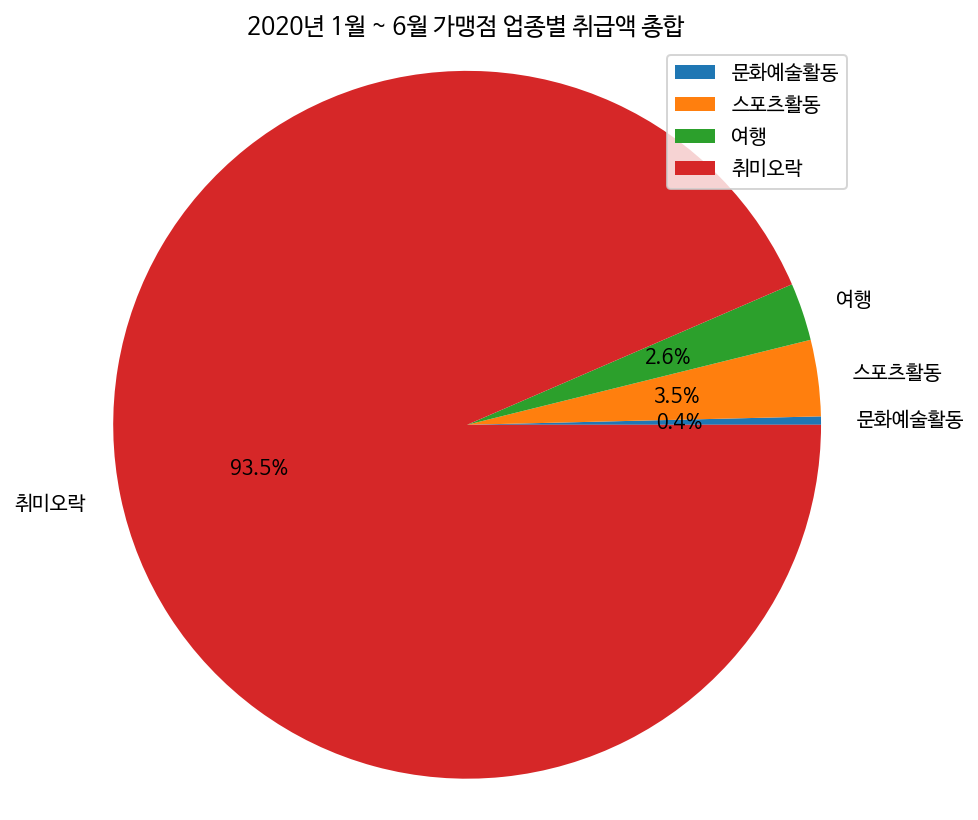

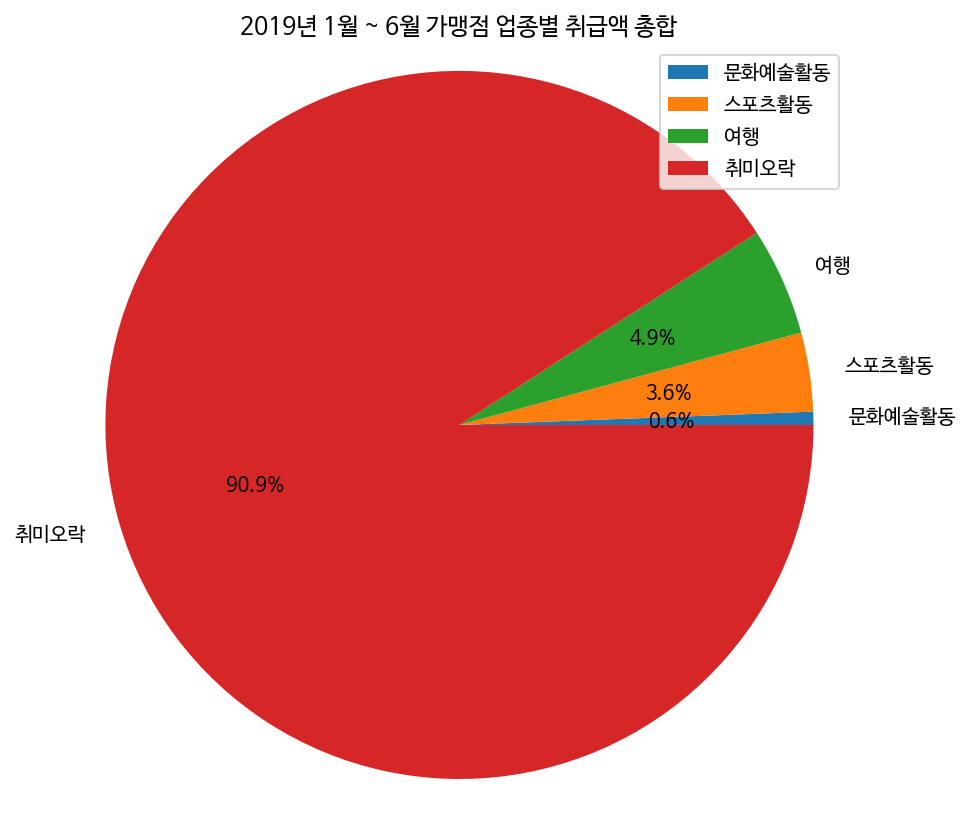

                 vlm        usec           vlm        usec
gb3                                                       
문화예술활동  5.986353e+11    21915791  9.877824e+11    49055956
스포츠활동   5.496987e+12    67231023  5.947616e+12    76304619
여행      4.162116e+12    88952133  8.129137e+12   139477646
취미오락    1.476249e+14  4358855120  1.499674e+14  4454478489


In [119]:
gb3 = df20.groupby(df20['gb3']).sum()

categories = gb3.index

plt.pie(gb3.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

gb3 = pd.concat([gb3,df19.groupby(df19['gb3']).sum()], axis=1)

categories = gb3.index

plt.pie(gb3.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

print(gb3)

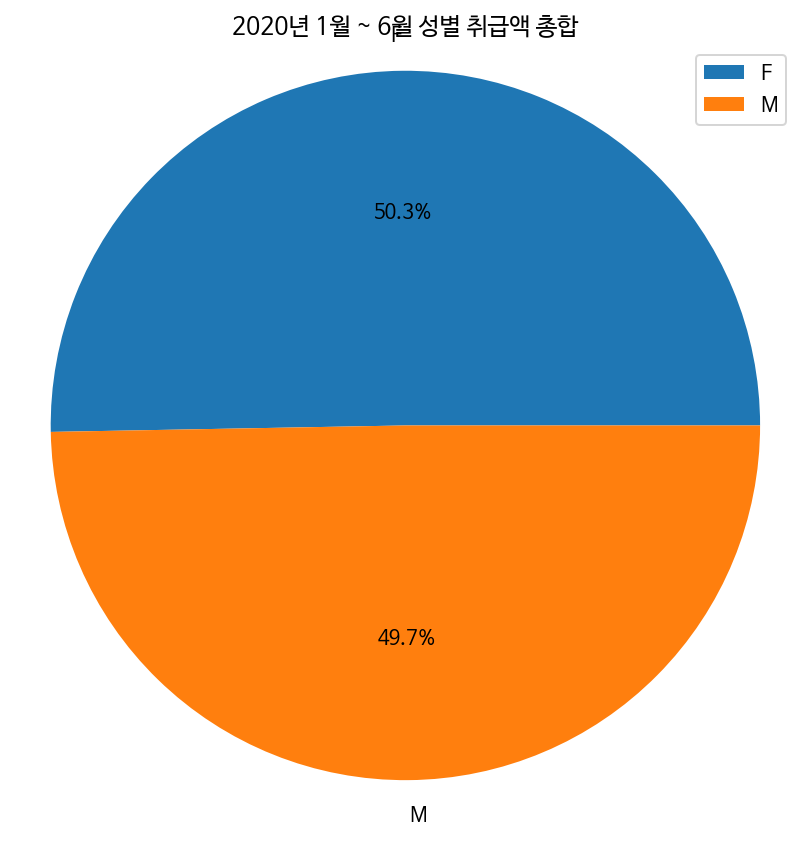

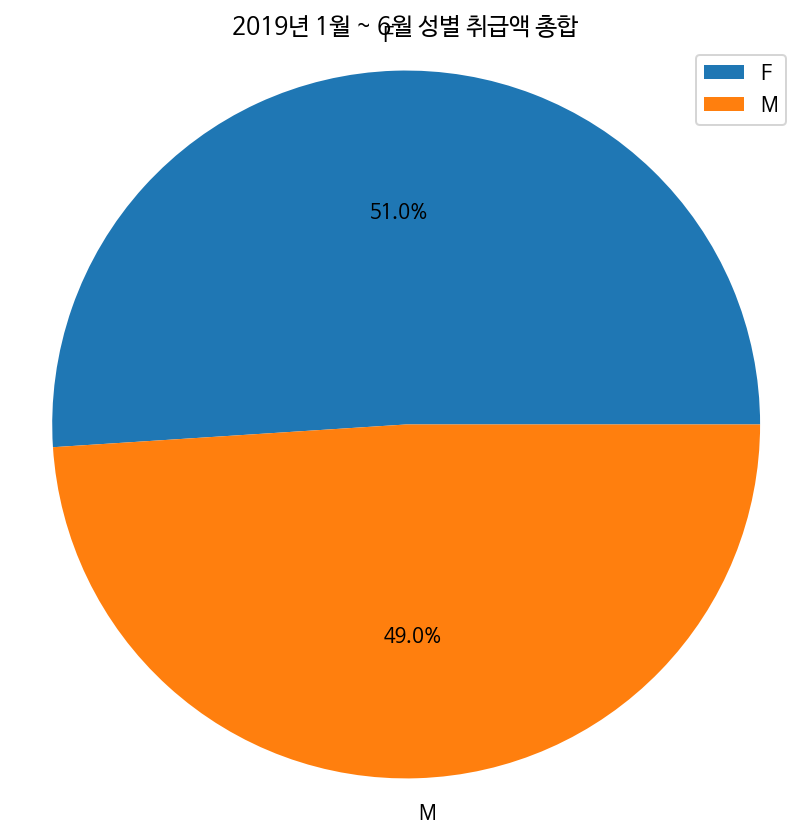

                  vlm        usec           vlm        usec
sex_ccd                                                    
F        7.939976e+13  2216343489  8.420574e+13  2348698591
M        7.848284e+13  2320610578  8.082619e+13  2370618119


In [122]:
sex_ccd = df20.groupby(df20['sex_ccd']).sum()

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

sex_ccd = pd.concat([sex_ccd,df19.groupby(df19['sex_ccd']).sum()], axis=1)

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

print(sex_ccd)

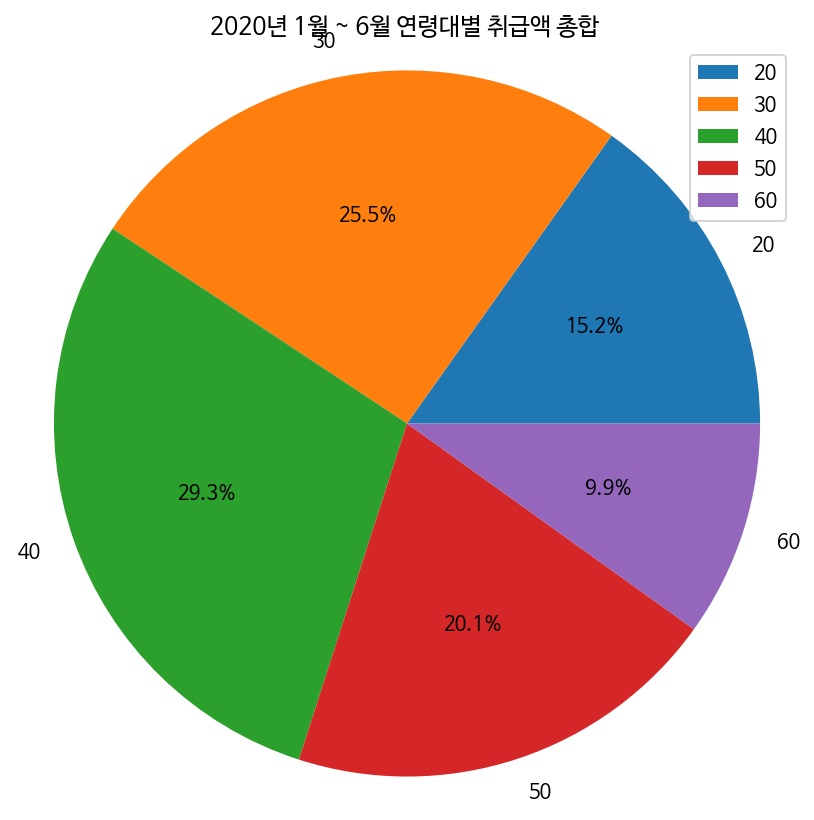

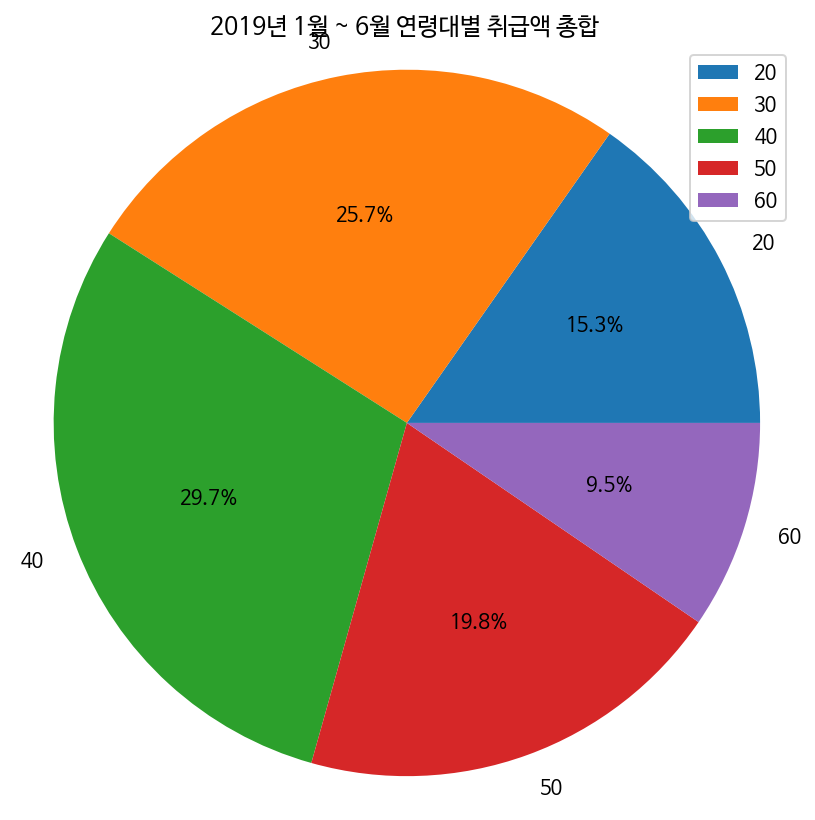

                    vlm        usec           vlm        usec
cln_age_r                                                    
20         2.394643e+13  1038904544  2.519720e+13  1160765580
30         4.031056e+13  1142265160  4.243074e+13  1188765184
40         4.633281e+13  1147802505  4.895082e+13  1191783843
50         3.165596e+13   802684802  3.271846e+13   797537509
60         1.563685e+13   405297056  1.573470e+13   380464594


In [123]:
cln_age_r = df20.groupby(df20['cln_age_r']).sum()

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

cln_age_r = pd.concat([cln_age_r,df19.groupby(df19['cln_age_r']).sum()], axis=1)

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

print(cln_age_r)

                 vlm       usec
ta_ym                          
202001  2.810976e+13  786683357
202002  2.414803e+13  686017612
202003  2.429340e+13  705869995
202004  2.488442e+13  726709026
202005  2.909836e+13  827417087
202006  2.734863e+13  804256990


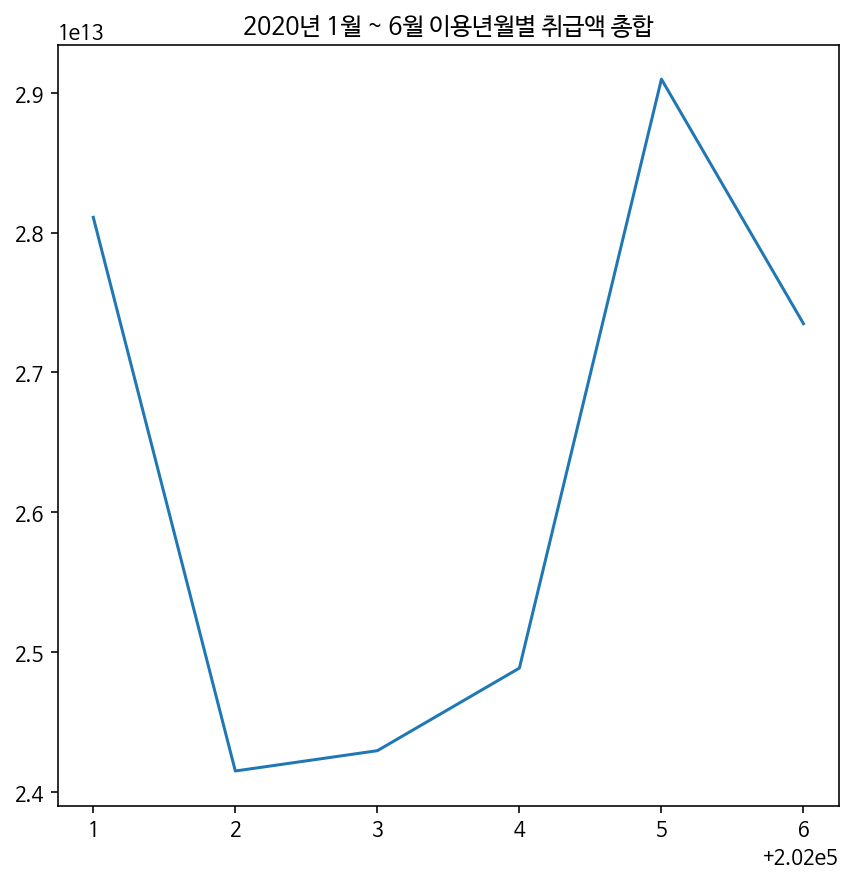

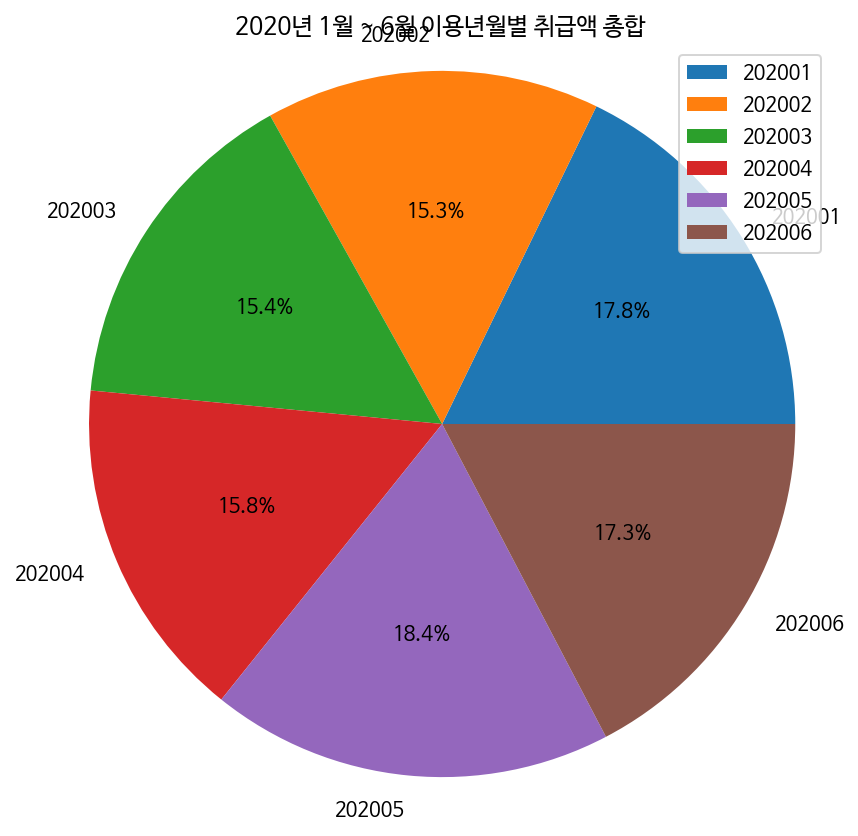

                 vlm       usec
ta_ym                          
202001  2.795184e+13  757355405
202002  2.232586e+13  616845737
202003  2.448539e+13  690775271
202004  2.264683e+13  652465674
202005  2.693823e+13  790268808
202006  2.538841e+13  752148222


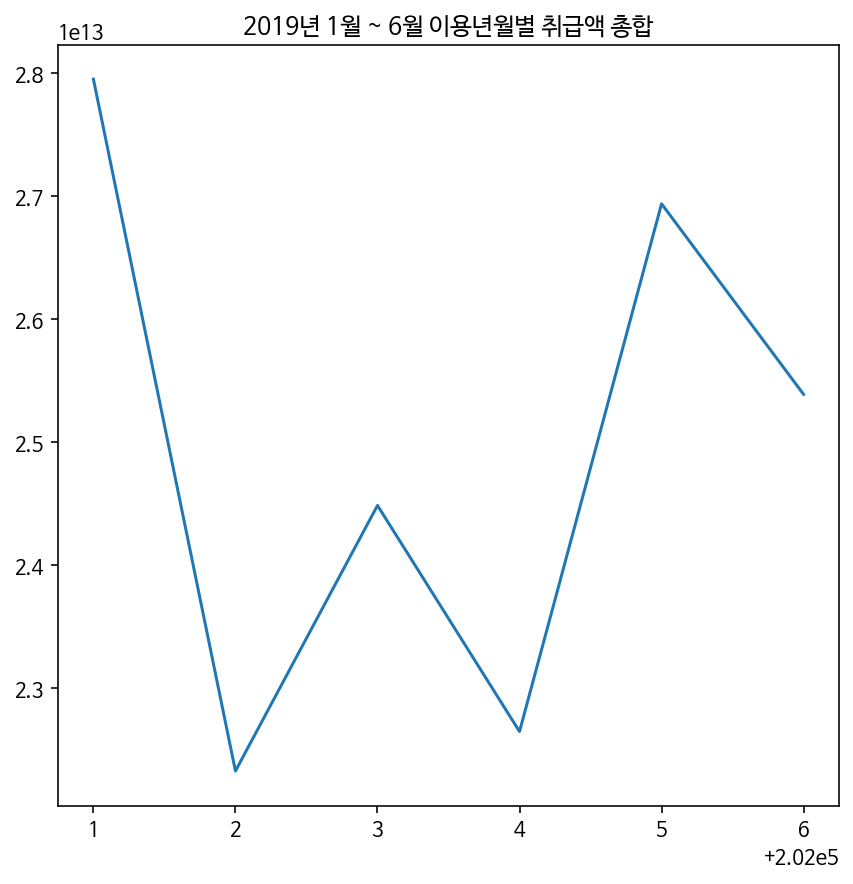

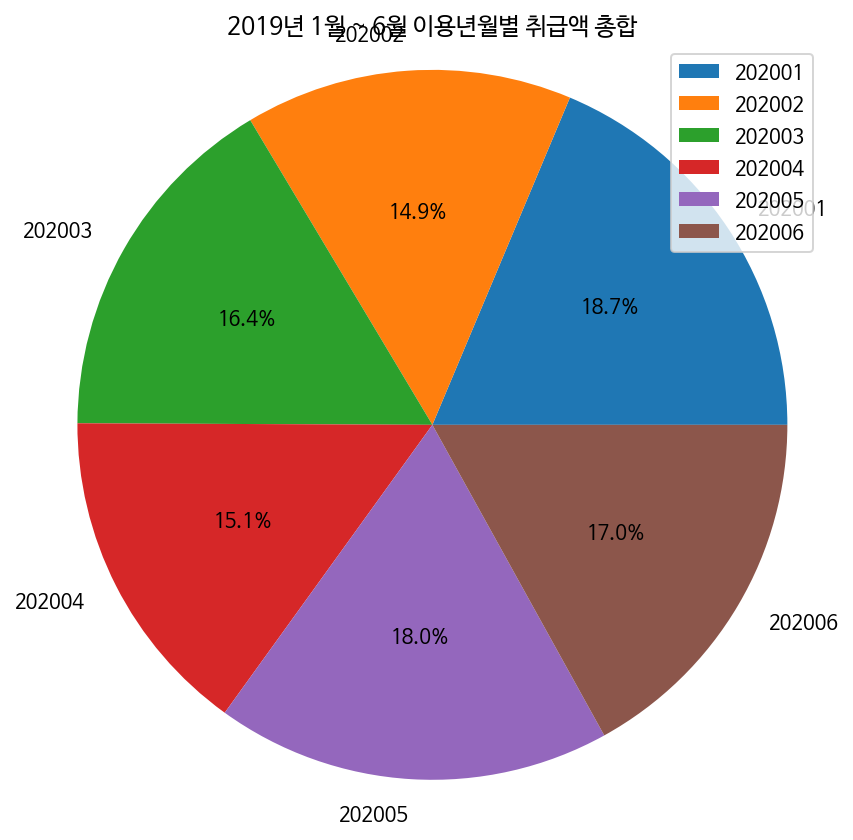

In [129]:
ta_ym = df20.groupby(df20['ta_ym']).sum()

print(ta_ym)

categories = ta_ym.index

plt.plot(ta_ym.iloc[:,0])
plt.title('2020년 1월 ~ 6월 이용년월별 취급액 총합')
plt.show()

plt.pie(ta_ym.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 이용년월별 취급액 총합')
plt.legend(categories)
plt.show()

ta_ym = df19.groupby(df20['ta_ym']).sum()

print(ta_ym)

categories = ta_ym.index

plt.plot(ta_ym.iloc[:,0])
plt.title('2019년 1월 ~ 6월 이용년월별 취급액 총합')
plt.show()

plt.pie(ta_ym.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 이용년월별 취급액 총합')
plt.legend(categories)
plt.show()

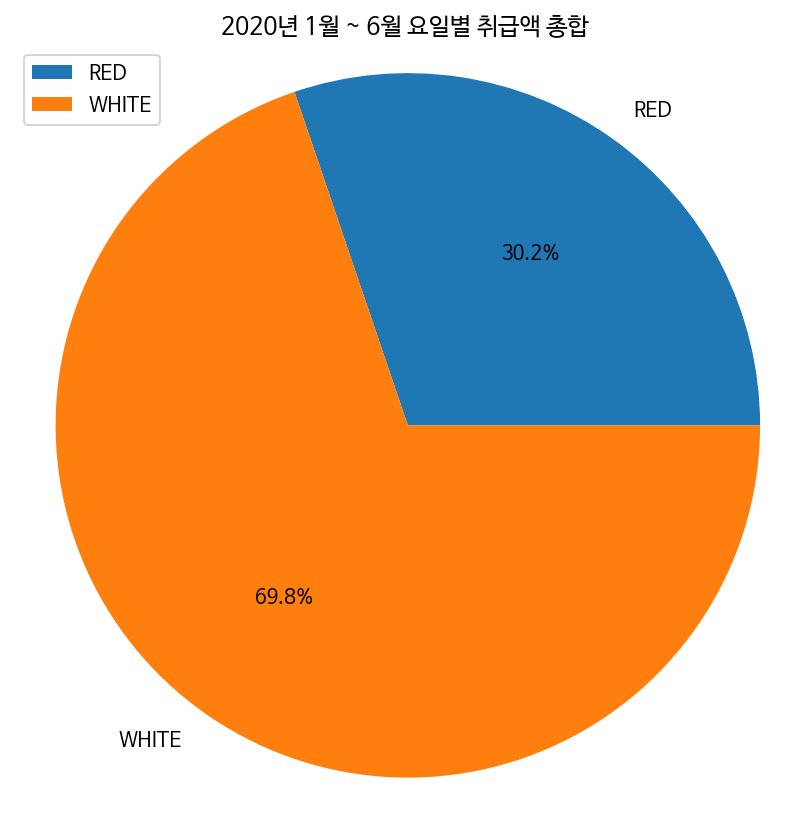

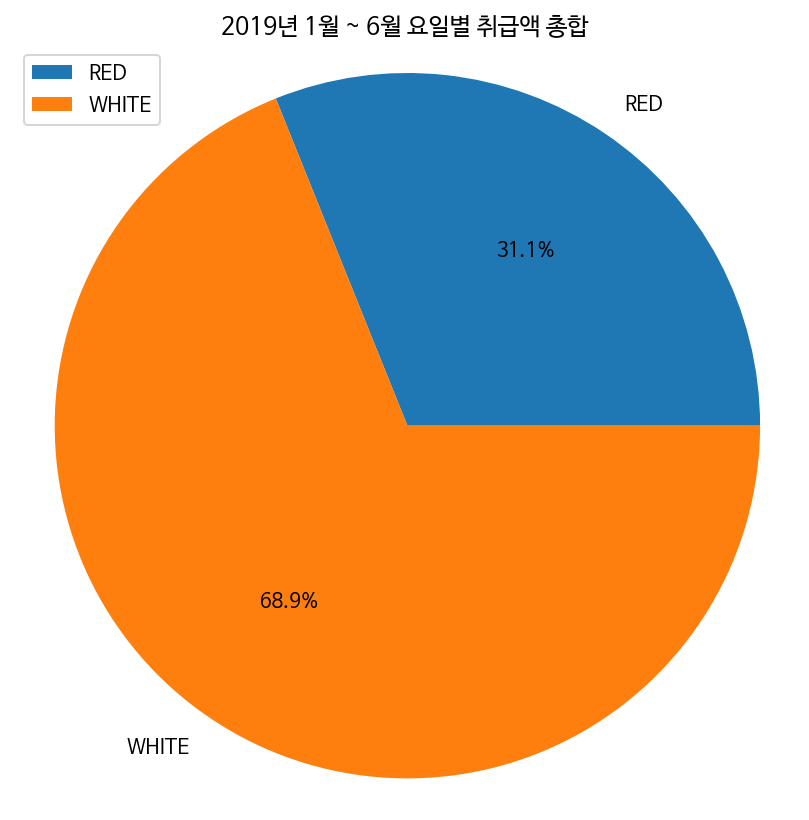

                    vlm        usec           vlm        usec
daw_ccd_r                                                    
RED        4.770564e+13  1349710007  5.130461e+13  1460908790
WHITE      1.101770e+14  3187244060  1.137273e+14  3258407920


In [131]:
daw_ccd_r = df20.groupby(df20['daw_ccd_r']).sum()

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

daw_ccd_r = pd.concat([daw_ccd_r,df19.groupby(df19['daw_ccd_r']).sum()], axis=1)

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(daw_ccd_r)

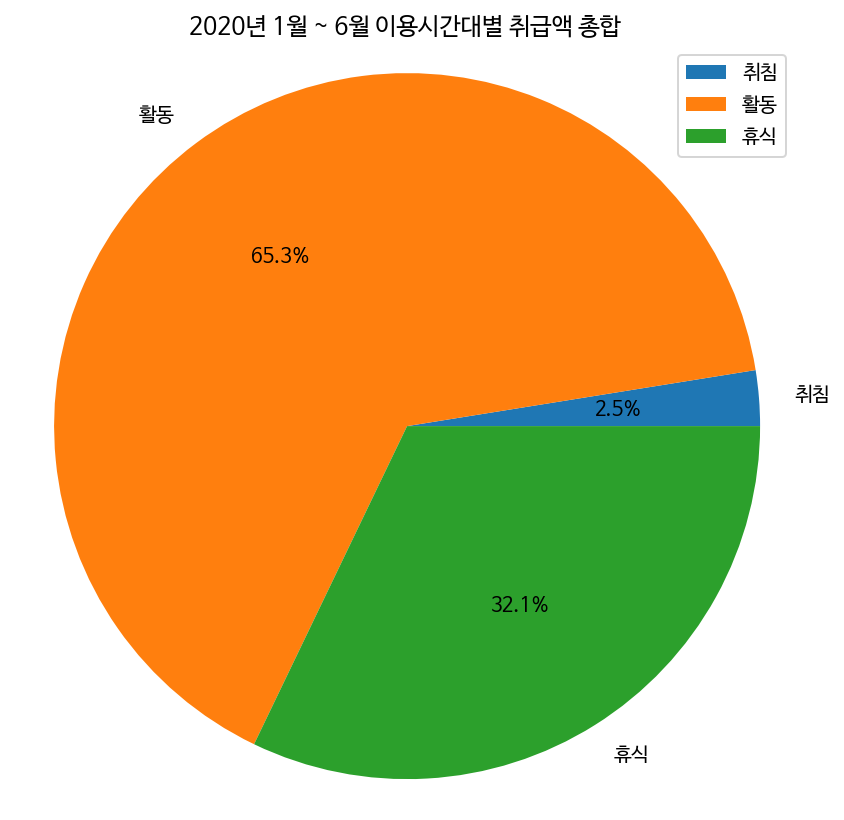

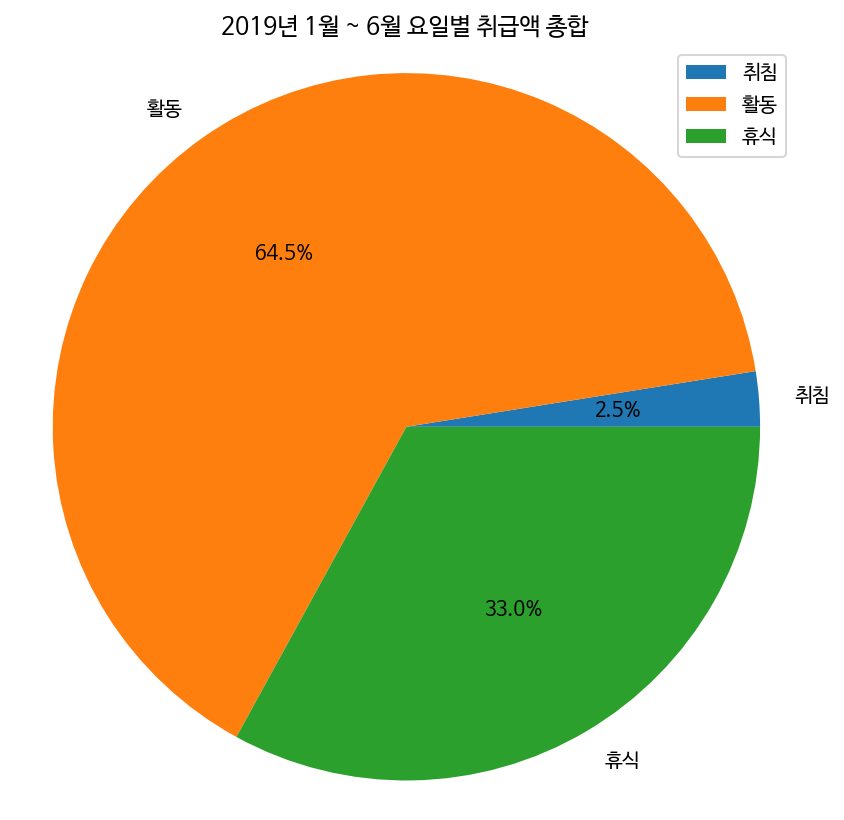

                         vlm        usec           vlm        usec
apv_ts_dl_tm_r                                                    
취침              4.006718e+12   101833146  4.154211e+12   102692412
활동              1.031388e+14  3053387985  1.064543e+14  3133445487
휴식              5.073706e+13  1381732936  5.442345e+13  1483178811


In [132]:
apv_ts_dl_tm_r = df20.groupby(df20['apv_ts_dl_tm_r']).sum()

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 이용시간대별 취급액 총합')
plt.legend(categories)
plt.show()

apv_ts_dl_tm_r = pd.concat([apv_ts_dl_tm_r,df19.groupby(df19['apv_ts_dl_tm_r']).sum()], axis=1)

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(apv_ts_dl_tm_r)

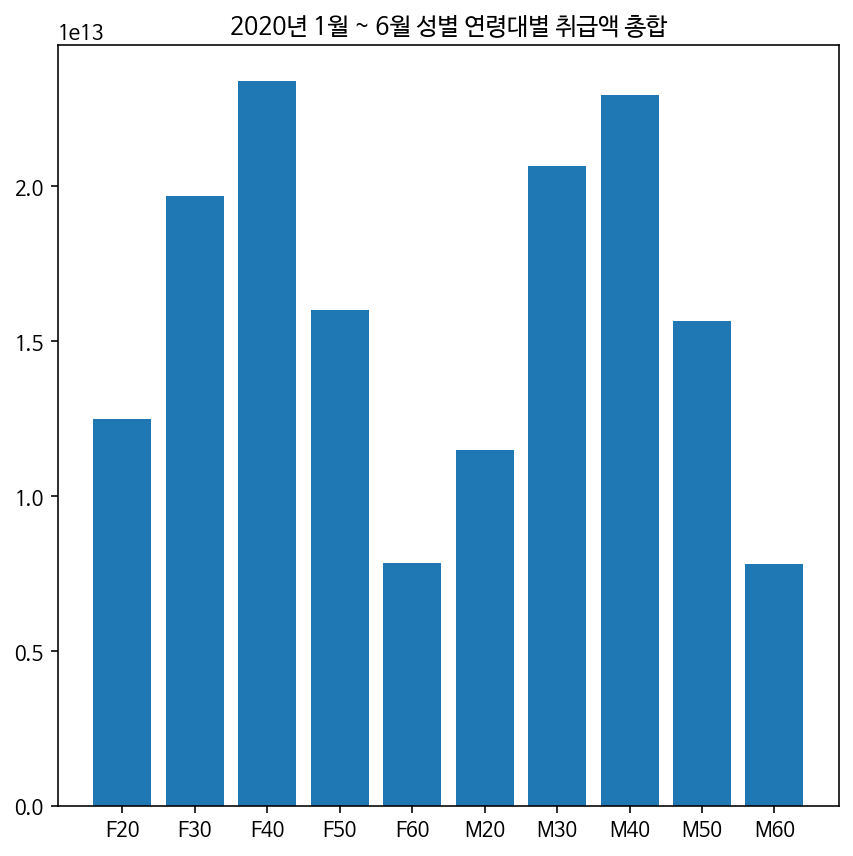

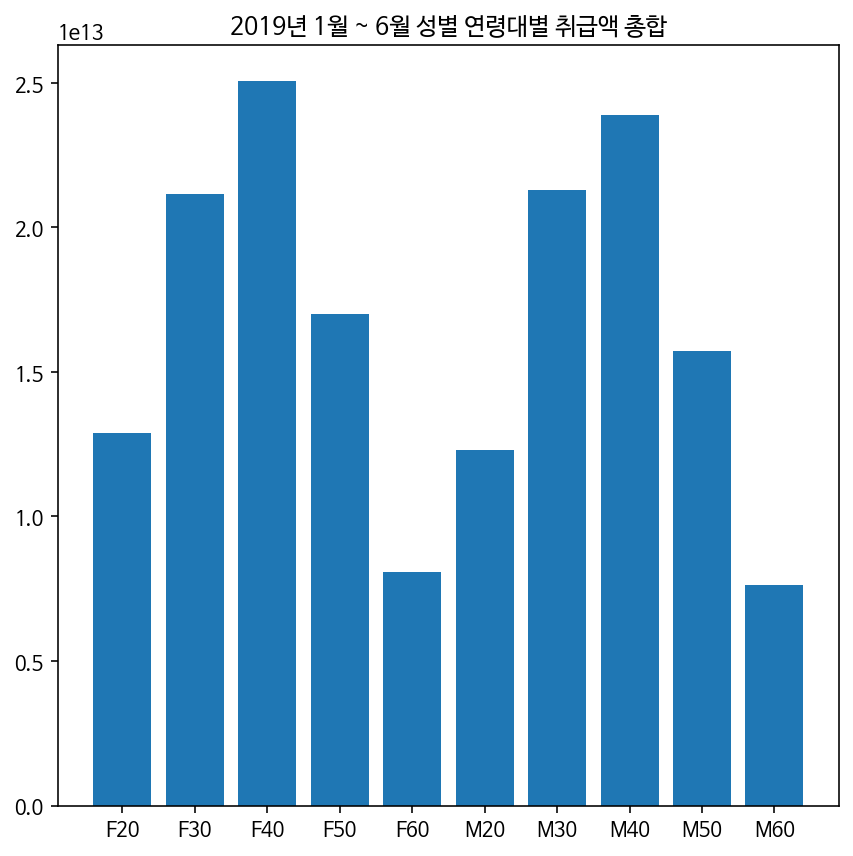

                            vlm       usec           vlm       usec
sex_ccd cln_age_r                                                  
F       20         1.246820e+13  518490198  1.289117e+13  573625887
        30         1.967518e+13  542186257  2.115578e+13  578268723
        40         2.339895e+13  570782683  2.506529e+13  605164802
        50         1.601168e+13  396146996  1.699826e+13  407934437
        60         7.845754e+12  188737355  8.095239e+12  183704742
M       20         1.147822e+13  520414346  1.230603e+13  587139693
        30         2.063539e+13  600078903  2.127495e+13  610496461
        40         2.293385e+13  577019822  2.388554e+13  586619041
        50         1.564428e+13  406537806  1.572021e+13  389603072
        60         7.791091e+12  216559701  7.639460e+12  196759852


In [134]:
sex_ccd_cln_age_r = df20.groupby([df20['sex_ccd'],df20['cln_age_r']]).sum()

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,0])
plt.title('2020년 1월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

sex_ccd_cln_age_r = pd.concat([sex_ccd_cln_age_r,df19.groupby([df19['sex_ccd'],df19['cln_age_r']]).sum()], axis=1)

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,2])
plt.title('2019년 1월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

print(sex_ccd_cln_age_r)